# Plot Convergence Test

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import matplotlib.ticker as mticker
import math

%config InlineBackend.figure_formats = ['svg']

In [2]:
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 9.
plt.rcParams['lines.markeredgewidth'] = 0.7

In [7]:
main_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions\\'
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'


# ra_path = ['1e4','1e5','1e6','1e7','1e8','1e9','1e10']

fname = os.path.join(main_path,'[!m]*')
fileL = glob.glob(fname) #list of files
fileL = [file.replace(main_path,'') for file in fileL]
[fileL.remove(file) for file in fileL if '_' in file]; [fileL.remove(file) for file in fileL if 'Plume' in file];
ra_path = sorted (fileL, key = lambda x: (len (x), x))

newColOrder = ['Ra','Res','NuT','NuB','VRMS']; Data = pd.DataFrame();

for i in range(len(ra_path)):
    dataRes = []
    fname = os.path.join(main_path+ra_path[i],'[!m]*')
    fileL = glob.glob(fname) #list of files
    fileL = [file.replace(main_path+ra_path[i]+'\\','') for file in fileL]
    [fileL.remove(file) for file in fileL if '_' in file]; [fileL.remove(file) for file in fileL if 'txt' in file];
    [fileL.remove(file) for file in fileL if '_' in file]; [fileL.remove(file) for file in fileL if 'txt' in file];
    [fileL.remove(file) for file in fileL if '_' in file]; [fileL.remove(file) for file in fileL if 'Plume' in file];
    [fileL.remove(file) for file in fileL if 'Plume' in file]; [fileL.remove(file) for file in fileL if 'Plume' in file];
    fileL = list(map(int, fileL)); fileL = sorted(fileL)
    dataRes = pd.DataFrame(fileL) #This gets the resolutions from folder names
    
    fname = os.path.join(main_path+ra_path[i],'[!m]*.txt')
    fileL = glob.glob(fname) #list of files
    [fileL.remove(file) for file in fileL if 'surface' in file];
    temp = []
    for file in fileL:
        a = fileL.index(file)
        b = pd.read_csv(file,header=None)
        b.rename(columns={0:a}, inplace=True)
        temp.append(b)
    c = b.copy()
    c.values[:] = ra_path[i]
    temp.append(c)

    my_data = pd.concat(temp, axis=1, join="inner",ignore_index=True)
    my_data.insert(3, 4, dataRes)
    my_data.rename(columns={0:'NuT',1:'NuB',3:'Ra',2:'VRMS',4:'Res'},inplace=True)
    my_data = my_data[newColOrder]
    Data = pd.concat([Data,my_data],ignore_index=True)
    
Data = Data.reset_index(drop=True)
Data = Data.sort_values(by=['Ra','Res'])

In [9]:
Data.tail(5)

,Ra,Res,NuT,NuB,VRMS
38,6.000000e+09,128,276.202212,266.634424,95035.893596
39,6.000000e+09,256,291.512298,291.260261,122976.842941
40,1.000000e+10,256,348.805713,349.158726,166582.312656
41,3.000000e+10,256,480.417305,480.348149,321875.187770
42,6.000000e+10,256,623.178519,621.123524,496890.706307


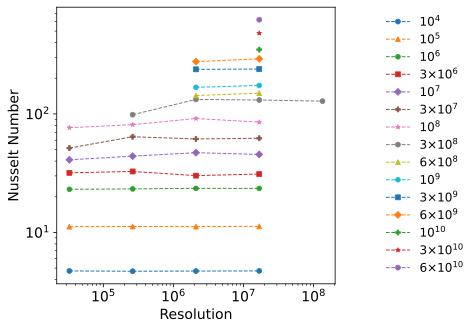

In [10]:
RaU = Data.Ra.unique()
lenRa = len(RaU)

import itertools
marker = itertools.cycle(('o','^','8','s','D','P','*')) 
plt.rcParams['lines.markersize'] = 5.
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

data = [[] for i in range(lenRa)] #empty nested list

for i in range(lenRa):
    data[i] = Data.loc[Data['Ra'] == RaU[i]].to_numpy()

plt.figure();

for i in range(lenRa):
    plt.plot(data[i][:,1]**3,data[i][:,2],marker = next(marker), linestyle='--',label='{}'.format(fmt(RaU[i])))

plt.ylabel('Nusselt Number')
plt.xlabel('Resolution');
plt.yscale('log');
plt.xscale('log');
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));

# plt.savefig(image_path + 'convergence_Nu.png',pad_inches=0.1,bbox_inches='tight');

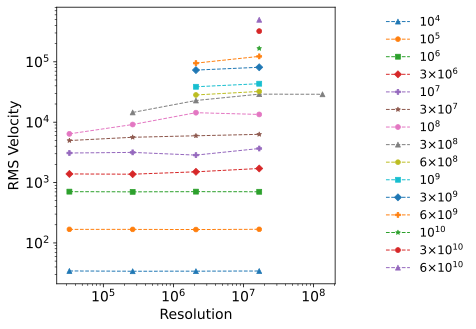

In [11]:
plt.figure();

for i in range(lenRa):
    plt.plot(data[i][:,1]**3,data[i][:,4],marker = next(marker), linestyle='--',label='{}'.format(fmt(RaU[i])))

plt.ylabel('RMS Velocity')
plt.xlabel('Resolution');
plt.yscale('log');
plt.xscale('log');
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
# plt.savefig(image_path + 'convergence_vrms.png',pad_inches=0.1,bbox_inches='tight');

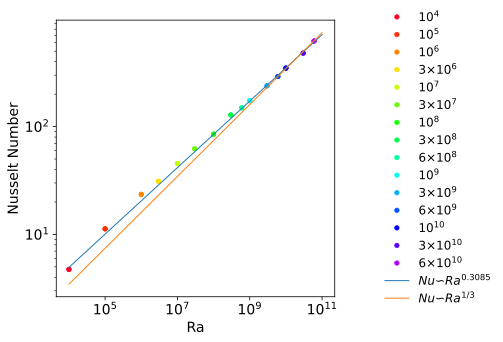

In [12]:
dataS = [[] for i in range(lenRa)] #empty nested list for largest resolution value

for i in range(lenRa):
    maxRes = np.max(Data['Res'].loc[Data['Ra'] == RaU[i]])
    dataS[i] = Data.loc[(Data['Ra'] == RaU[i]) & (Data['Res'] == maxRes)].to_numpy()

plt.rcParams['lines.markersize'] = 9.
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))
        
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa):
    plt.plot(dataS[i][0,0],dataS[i][0,2],'.',label='{}'.format(fmt(RaU[i])),color=colors[i])
    plt.plot(dataS[i][0,0],dataS[i][0,3],'.',color=colors[i])
    list1.append(dataS[i][0,0]); list1.append(dataS[i][0,0])
    list2.append(dataS[i][0,2]); list2.append(dataS[i][0,3])

plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,1e11,1e4)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

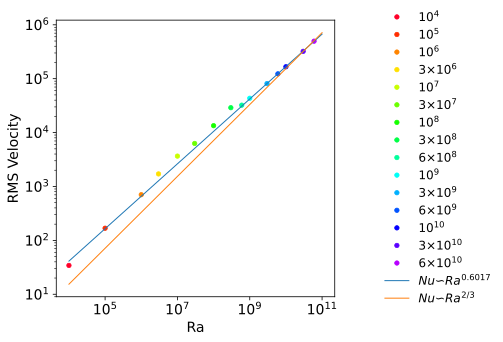

In [13]:
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa):
    plt.plot(dataS[i][0,0],dataS[i][0,4],'.',label='{}'.format(fmt(RaU[i])),color=colors[i])
    list1.append(dataS[i][0,0]);
    list2.append(dataS[i][0,4]);

plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(2/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

# xx = np.arange(1e4,1e10,1e4)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{2/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));